In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [340]:
balance = pd.read_csv('https://raw.githubusercontent.com/MarcosSaade/CognitionModel/main/balance_data.csv')
balance.head()

,Label,LW,LD,RW,RD
0,1,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [341]:
y = balance['Label']
X = balance
X = X.drop(axis=1, columns='Label')

In [342]:
X.head

<bound method NDFrame.head of      LW  LD  RW  RD
0     1   1   1   1
1     1   1   1   2
2     1   1   1   3
3     1   1   1   4
4     1   1   1   5
..   ..  ..  ..  ..
620   5   5   5   1
621   5   5   5   2
622   5   5   5   3
623   5   5   5   4
624   5   5   5   5

[625 rows x 4 columns]>

In [343]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=2)

In [344]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [345]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 10)
        self.layer2 = nn.Linear(10, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=1)
        return x

In [346]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=3, bias=True)
)

In [347]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [348]:
import tqdm

EPOCHS  = 300
X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 300/300 [00:00<00:00, 870.94it/s]


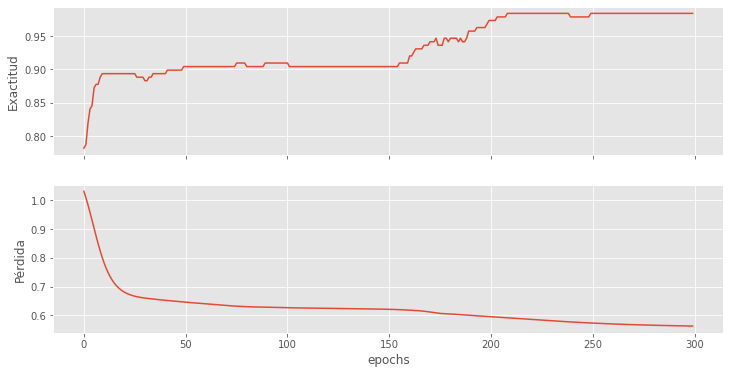

In [349]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("Exactitud")
ax2.plot(loss_list)
ax2.set_ylabel("Pérdida")
ax2.set_xlabel("epochs");

In [350]:
print(accuracy_list[-1])

0.9840425252914429
